In this exercise we are going to use Boston Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/Boston.csv"
BostonData = pd.read_csv(url)
del BostonData['Unnamed: 0']
BostonData.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = BostonData[BostonData.columns.values]
del X['medv']
y = BostonData['medv']

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest - Regression Problems

#### For documentation of RandomForestRegressor please refer to:
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [5]:
RF = RandomForestRegressor(n_estimators = 10000, #Number of trees - the more the better!
                           max_features = 4,     #How many features to randomly choose in each node 
                           min_samples_leaf = 10, #Minimum number of observations at each terminal node
                           oob_score = True,    #If you would like to record out of bage scores
                           random_state = 1)      
# if you do not set maximum number of features, then you'll have bagging

RF.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10000, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [6]:
sorted(zip(RF.feature_importances_,X.columns.values))

[(0.0011520709582964477, 'chas'),
 (0.0055412887678616372, 'zn'),
 (0.0059217053556689051, 'rad'),
 (0.010839118109372914, 'black'),
 (0.018982755191764782, 'age'),
 (0.028311346469279738, 'tax'),
 (0.029895032265189365, 'dis'),
 (0.049568147662482076, 'crim'),
 (0.064173062559108207, 'nox'),
 (0.070122081358297547, 'indus'),
 (0.070992951598043516, 'ptratio'),
 (0.32061517846414128, 'lstat'),
 (0.32388526124049299, 'rm')]

In [7]:
RF.oob_score_  #this value is like R^2

0.81461137327810274

#### A time-consuming way to tune your model on m - # of Features

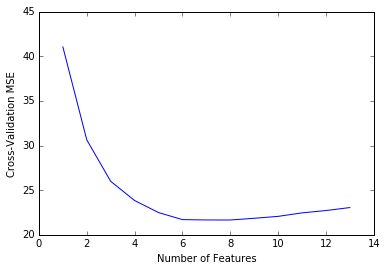

In [8]:
from sklearn.cross_validation import cross_val_score
Features = range(1,14)
score = []
for i in Features:
         RF = RandomForestRegressor(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 10, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 1,
                           n_jobs = -1) #Use all CPUs simultanously 
         score.append(-cross_val_score(RF, X, y, cv = 10, scoring = 'mean_squared_error', n_jobs = -1).mean())

plt.plot(Features, score)
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation MSE")
plt.show()            

In [9]:
index_Optimal_Features = np.argmin(score)
Optimal_Feature = Features[index_Optimal_Features]
print("The optimal level of features is %i which leads to minimum level of MSE of %f" %(Optimal_Feature, np.min(score)))

The optimal level of features is 8 which leads to minimum level of MSE of 21.656668


#### Using Out of Bag error to tune our models. This is so much faster than CV!

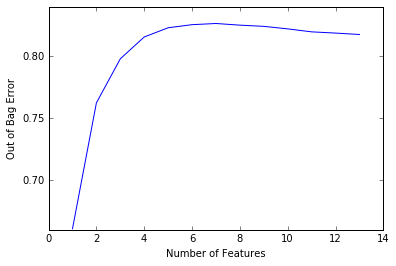

In [10]:
Features = range(1,14)
oob_score_RF = []
for i in Features:
        RF = RandomForestRegressor(n_estimators = 2000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 10, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 1,
                           n_jobs = -1)
        RF.fit(X,y)  
        oob_score_RF.append(RF.oob_score_)

        
plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Error")
plt.show()            
        


# Out of bag score is R^2 - the larger the better. Again we can see our model works best when Number of features
# is around 6 to 8. Almost same story as CV - but in a much faster time. 

# Random Forest - Categorical Variables

#### let's first categorize medv to 4 groups. 
Lowest 20% medv is categorized as Level 1

next 30% medv is categorized as Level 2

next 30% medv is categorized as Level 3

Top 20% medv is categorized as Level 4

In [11]:
BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[mask_cat4,'medvCategory'] = '4'

In [12]:
y = BostonData['medvCategory']

Documentation for RandomForestClassifier http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [13]:
from sklearn.ensemble import RandomForestClassifier

RFClass = RandomForestClassifier(n_estimators = 1000, 
                                 max_features = 4, # You can set it to a number or 'sqrt', 'log2', etc
                                 min_samples_leaf = 10,
                                 oob_score = True,
                                 random_state = 1,
                                 n_jobs = -1)
RFClass.fit(X, y)
print("Out of Bag Accuracy  = %f" %RFClass.oob_score_)
scores = cross_val_score(RFClass, X, y, cv = 10)
print("Cross-validation Accuracy = %f" %scores.mean())

Out of Bag Accuracy  = 0.731225
Cross-validation Accuracy = 0.653888


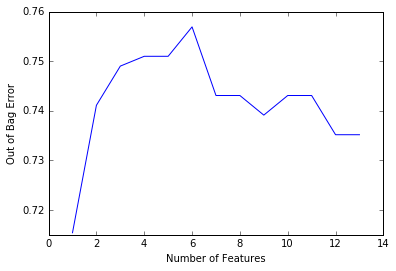

In [14]:
Features = range(1,14)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 1,
                           n_jobs = -1)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Error")
plt.show()             
        

# it sounds like choosing max_features as 6 is our best bet

In [15]:
# You can call predict the same way we called predict to any other algorithm we used before
y_hat = RFClass.predict(X)
print(y_hat)

['3' '3' '4' '4' '4' '3' '3' '2' '2' '2' '2' '2' '3' '2' '2' '2' '3' '2'
 '2' '2' '1' '2' '1' '1' '2' '2' '2' '1' '2' '2' '1' '2' '1' '1' '1' '2'
 '2' '2' '3' '4' '4' '3' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2'
 '2' '4' '3' '4' '3' '2' '2' '2' '3' '3' '4' '3' '2' '2' '2' '2' '3' '3'
 '3' '3' '3' '3' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3' '3' '4' '4'
 '3' '3' '3' '3' '2' '4' '3' '4' '4' '4' '3' '3' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '3' '2' '2' '2' '2' '2' '2' '2' '2' '3' '2' '2' '2' '2' '2'
 '2' '2' '2' '1' '2' '2' '2' '2' '2' '2' '2' '2' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '4' '3' '3' '3' '4'
 '4' '4' '3' '3' '4' '3' '3' '3' '2' '2' '3' '3' '3' '3' '3' '3' '4' '4'
 '4' '3' '4' '4' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4'
 '4' '4' '4' '3' '4' '4' '4' '3' '3' '2' '3' '2' '3' '2' '3' '3' '2' '3'
 '3' '3' '3' '3' '3' '2' '3' '3' '4' '4' '4' '4' '4' '4' '3' '4' '4' '4'
 '3' '3' '3' '4' '3' '3' '3' '2' '3' '3' '2' '2' '3

# Boosting Algorithm - Regression

For full documention, please refer to: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

In [16]:
y = BostonData['medv']


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_Tree = GradientBoostingRegressor(learning_rate = 0.01, # This is lambda, a tuning parameter, usually between 0.01 and 0.1
                                     n_estimators = 1000, #This is B, a tuning parameter, using large B can cause overfitting
                                     max_depth = 2, #This is d, another tuning parameter, usually max_depth < 5
                                     min_samples_leaf = 10,
                                     random_state = 1)

score = (-cross_val_score(GBR_Tree, X, y, cv = 10, scoring = 'mean_squared_error',  n_jobs = -1)).mean()
print(score)

18.8997803934


#### Tuning 3 parameters simultanously is a very time-consuming task. Let's tune it step by step and via a semi-greedy approach

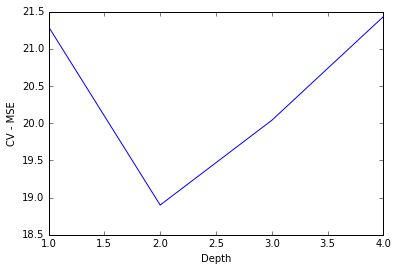

In [18]:
Depth = range(1,5)
Score = []
for i in Depth:
                GBR_Tree = GradientBoostingRegressor(learning_rate = 0.01, # This is lambda, a tuning parameter, usually between 0.01 and 0.1
                                             n_estimators = 1000, #This is B, a tuning parameter, using large B can cause overfitting
                                             max_depth = i, #This is d, another tuning parameter, usually max_depth < 5
                                             min_samples_leaf = 10,
                                             random_state = 1)
        
                Score.append(-cross_val_score(GBR_Tree, X, y, cv=10, scoring='mean_squared_error', n_jobs = -1).mean())

plt.plot(Depth, Score)
plt.xlabel("Depth")
plt.ylabel("CV - MSE")
plt.show()  

# it seems like Max_Depth = 2 gives us the lowest CV-Error

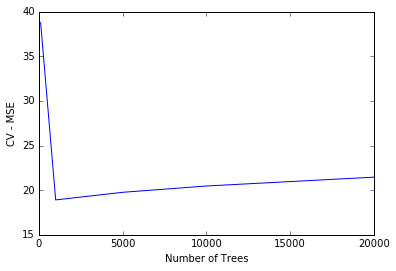

In [19]:
Score = []
NumberOfTrees = [100,1000,5000,10000,20000]
for i in NumberOfTrees:
                GBR_Tree = GradientBoostingRegressor(learning_rate = 0.01, # This is lambda, a tuning parameter, usually between 0.01 and 0.1
                                             n_estimators = i, #This is B, a tuning parameter, using large B can cause overfitting
                                             max_depth = 2, #This is d, another tuning parameter, usually max_depth < 5
                                             min_samples_leaf = 10)
        
                Score.append(-cross_val_score(GBR_Tree, X, y, cv = 10, scoring = 'mean_squared_error', n_jobs = -1).mean())

plt.plot(NumberOfTrees, Score)
plt.xlabel("Number of Trees")
plt.ylabel("CV - MSE")
plt.show()                  
                
            
# it seems like at Tree_Size = 1000 
# You can localize your search. Even further. For example try size of tree from 500 to 5000 with increments of 100
# Remember Learning Rate and Number of trees should be tuned with one another. Lower leawrning rates require more trees

In [20]:
Index_Min = np.argmin(Score)
Optimal_tree = NumberOfTrees[Index_Min]
print("Optimal tree = %i which leads to minimum error of %f" %(Optimal_tree, np.min(Score)))

Optimal tree = 1000 which leads to minimum error of 18.908070


# Boosting Algorithm - Classification

Please refer to the following link for its documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [21]:
y = BostonData['medvCategory']

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01,
                                      n_estimators = 1000,
                                      max_depth = 2,
                                      min_samples_leaf = 10,
                                      random_state = 1)

# Unfortunately we cannot use cross_val_score in this case. cross_val_score returns log of loss which is not a 
# measure we are interested in, in this course. 

from sklearn import cross_validation

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) #10 fold CV

scores = []

for train_index, test_index in kf:        
        GBC_Tree.fit(X.iloc[train_index], y.iloc[train_index])
        y_hat_test = GBC_Tree.predict(X.iloc[test_index]) 
        scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))

Score_GBC_CV = np.mean(scores)    

print(Score_GBC_CV) 


0.751098039216


# Tune your algorithm to get better predictibility